

---


#${\color{Gray}{ARTIFICIAL \ \ NEURAL \ \ NETWORKS}}$

---



**Classification Using Artificial Neural Networks with Hyperparameter Tuning on Alphabets Data**

**Overview**

In this assignment, you will be tasked with developing a classification model using Artificial Neural Networks (ANNs) to classify data points from the "Alphabets_data.csv" dataset into predefined categories of alphabets. This exercise aims to deepen your understanding of ANNs and the significant role hyperparameter tuning plays in enhancing model performance.

**Dataset:** "Alphabets_data.csv"

The dataset provided, "Alphabets_data.csv", consists of labeled data suitable for a classification task aimed at identifying different alphabets. Before using this data in your model, you'll need to preprocess it to ensure optimal performance.


In [1]:
# @title $Install \ \ keras-tuner$
!pip install -q -U keras-tuner

In [2]:
# @title $Import \ \ Required \ \ Libraries$
import pandas as pd
import numpy as np

import tensorflow as tf
import keras_tuner as kt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,4)
plt.rcParams['figure.dpi']= 150
import seaborn as sns
sns.set_theme(style='darkgrid',palette='rainbow')

In [3]:
# @title $Upload \ \ Dataset$
df0 = pd.read_csv('Alphabets_data.csv')
df0

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


# **1. Data Exploration and Preprocessing**
●	Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.

●	Execute necessary data preprocessing steps including data normalization, managing missing values.

In [4]:
# @title $Duplicate \ \ Records$
print('No. of Duplicate Records =',df0.duplicated().sum())

No. of Duplicate Records = 1332


In [5]:
# @title $Drop \ \ Duplicate \ \ Records$
drop_duplicates = "Yes" # @param ["Yes", "No"]
if drop_duplicates == "Yes":
    df=df0.drop_duplicates()
else:
    df=df0.copy()


print('Dataframe Shape :',df.shape)

Dataframe Shape : (18668, 17)


In [6]:
# @title $Dataset \ \ Information$
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18668 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  18668 non-null  object
 1   xbox    18668 non-null  int64 
 2   ybox    18668 non-null  int64 
 3   width   18668 non-null  int64 
 4   height  18668 non-null  int64 
 5   onpix   18668 non-null  int64 
 6   xbar    18668 non-null  int64 
 7   ybar    18668 non-null  int64 
 8   x2bar   18668 non-null  int64 
 9   y2bar   18668 non-null  int64 
 10  xybar   18668 non-null  int64 
 11  x2ybar  18668 non-null  int64 
 12  xy2bar  18668 non-null  int64 
 13  xedge   18668 non-null  int64 
 14  xedgey  18668 non-null  int64 
 15  yedge   18668 non-null  int64 
 16  yedgex  18668 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
# @title $Dataset \ \ Description \ \ Numerical \ \ Columns$
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [8]:
# @title $Dataset \ \ Description \ \ Categorical \ \ Columns$
df.describe(include='object')

,letter
count,18668
unique,26
top,P
freq,782


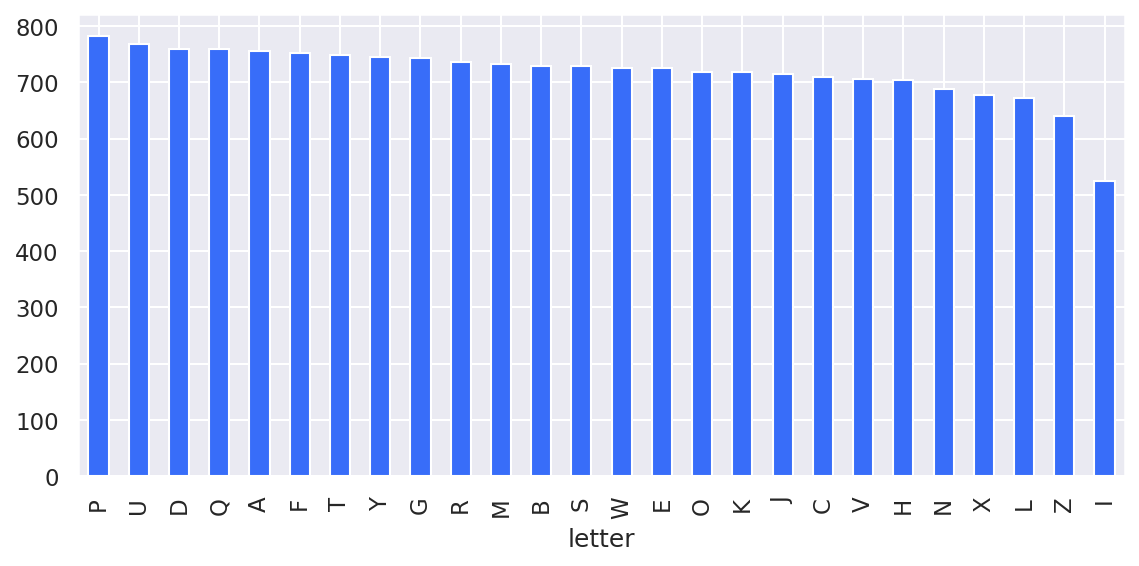

In [9]:
# @title $Barplot \ \ for \ \ letters$
df['letter'].value_counts(sort=True).plot(kind='bar')
plt.show()

In [10]:
# @title $No. \ \ of \ \ unique \ \ values \ \ in \ \ each \ \ column$
df.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

In [11]:
# @title $Categorical \ \& \ Numerical \ \ Columns $
cat_columns = df.select_dtypes(include='object').columns.tolist()
print('Categorical Columns :', cat_columns)
num_columns = df.select_dtypes(exclude='object').columns.tolist()
print('Numerical Columns :', num_columns)

Categorical Columns : ['letter']
Numerical Columns : ['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge', 'yedgex']


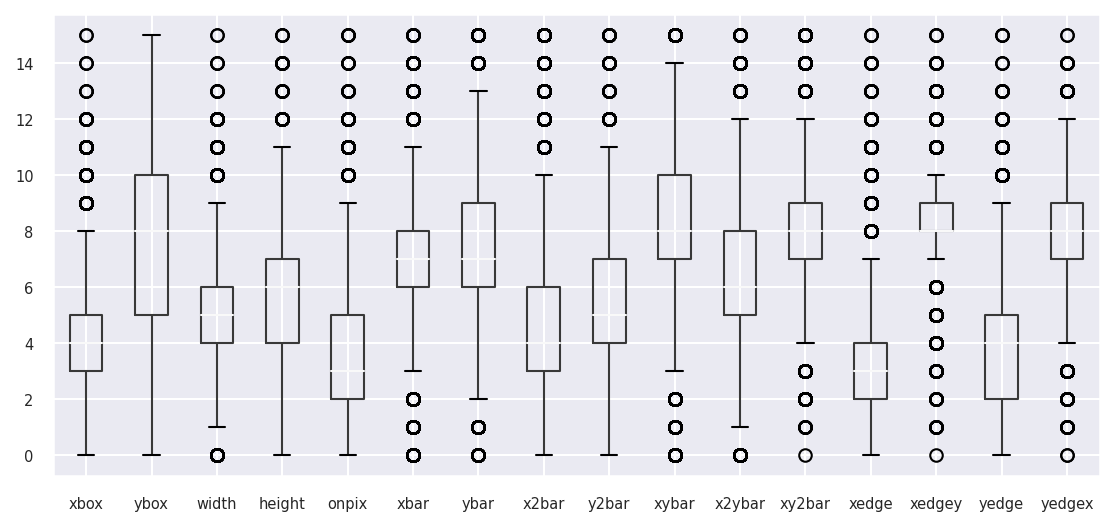

In [12]:
# @title $Boxplot$
df.boxplot(fontsize=7)
plt.show()

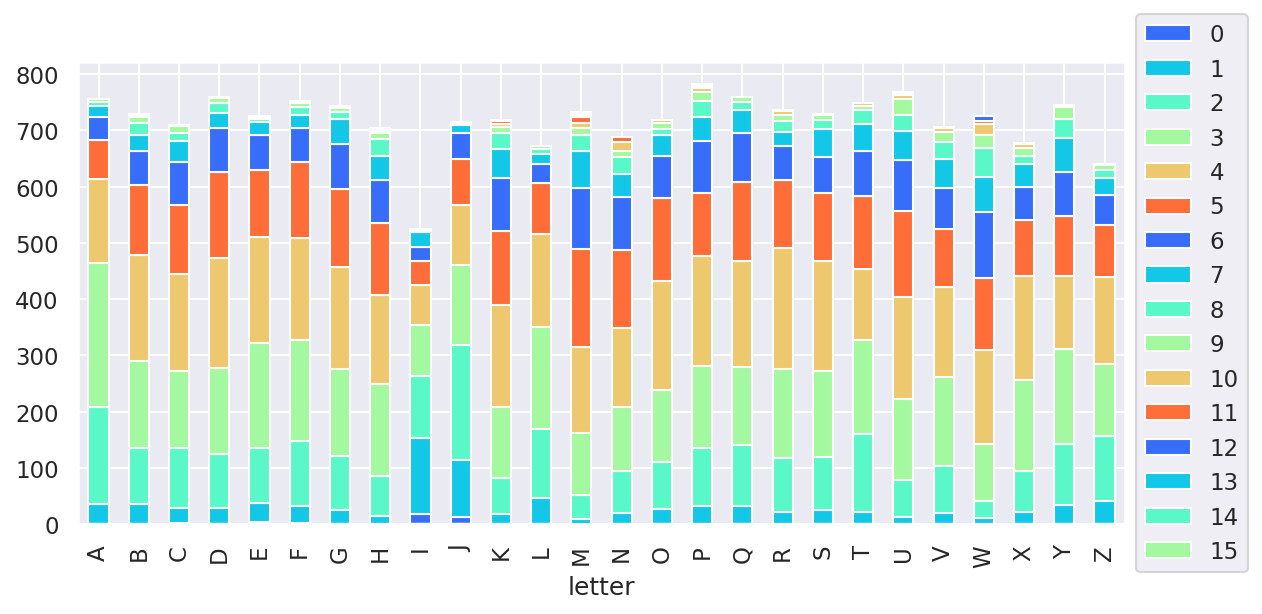

---------------------------------------------------------------------------------------------------


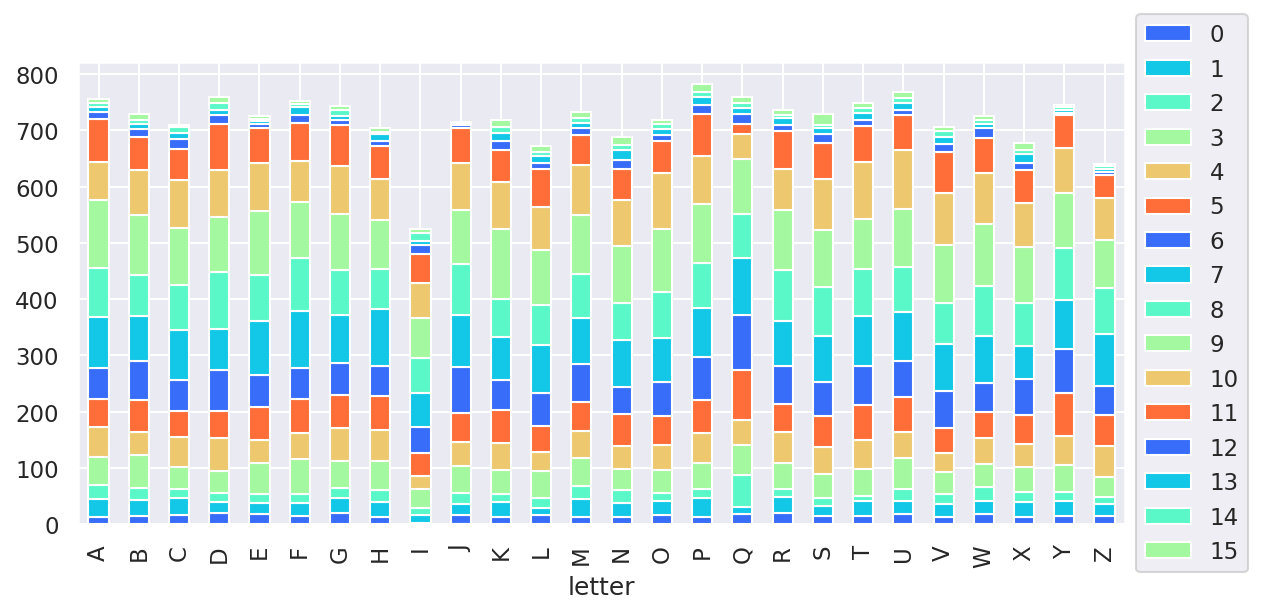

---------------------------------------------------------------------------------------------------


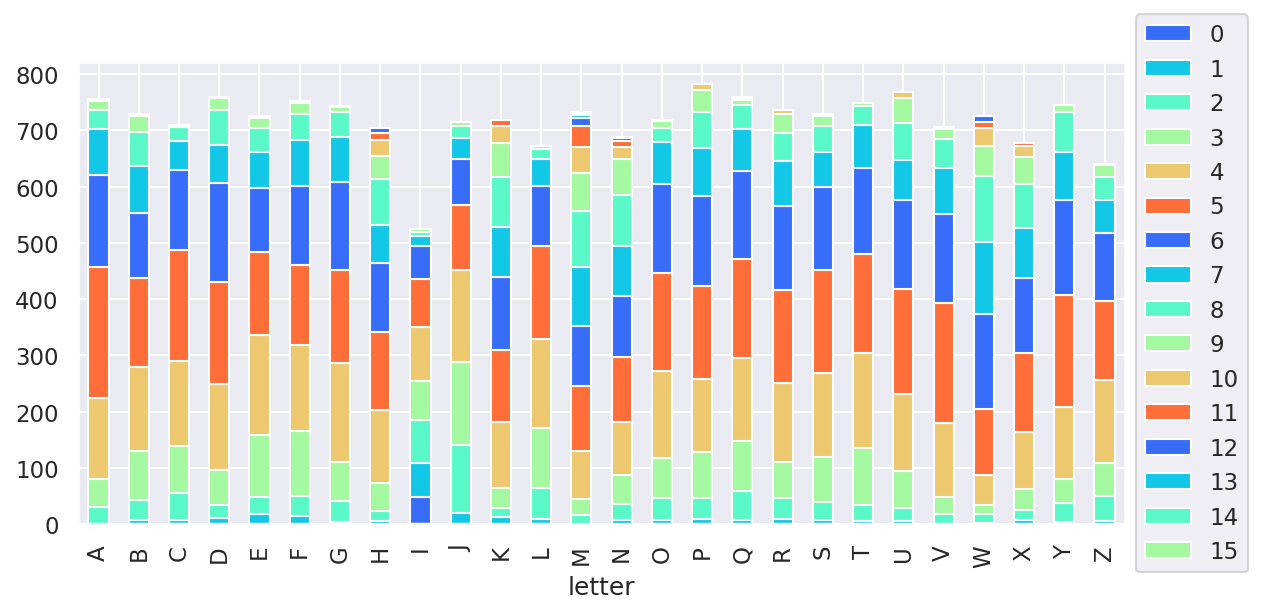

---------------------------------------------------------------------------------------------------


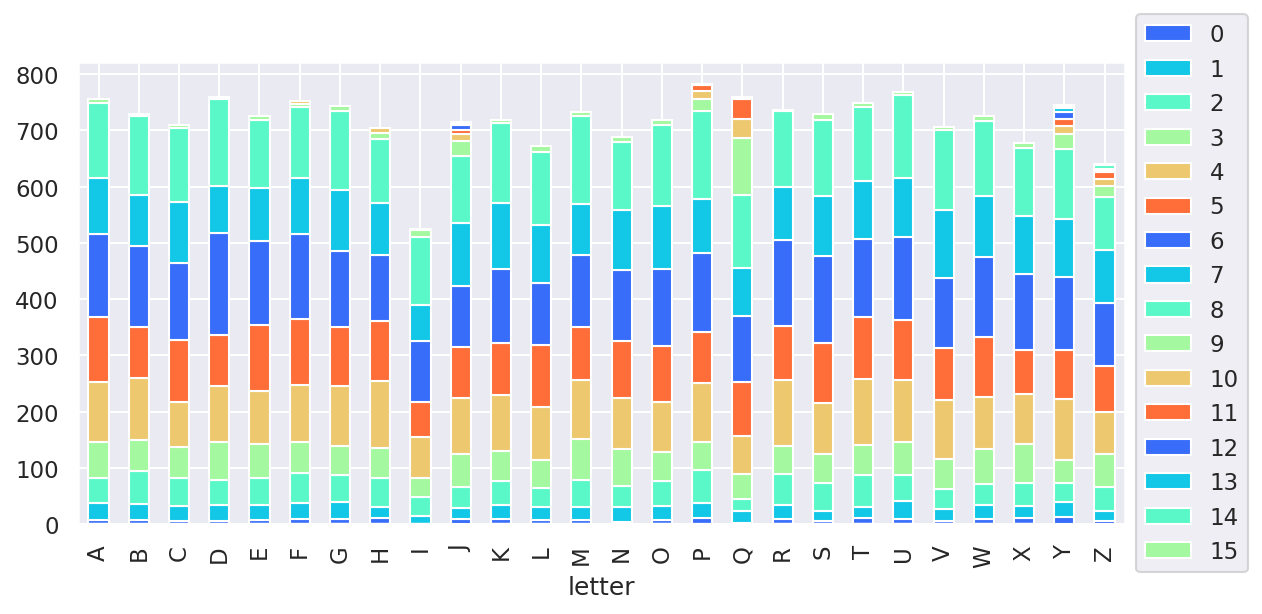

---------------------------------------------------------------------------------------------------


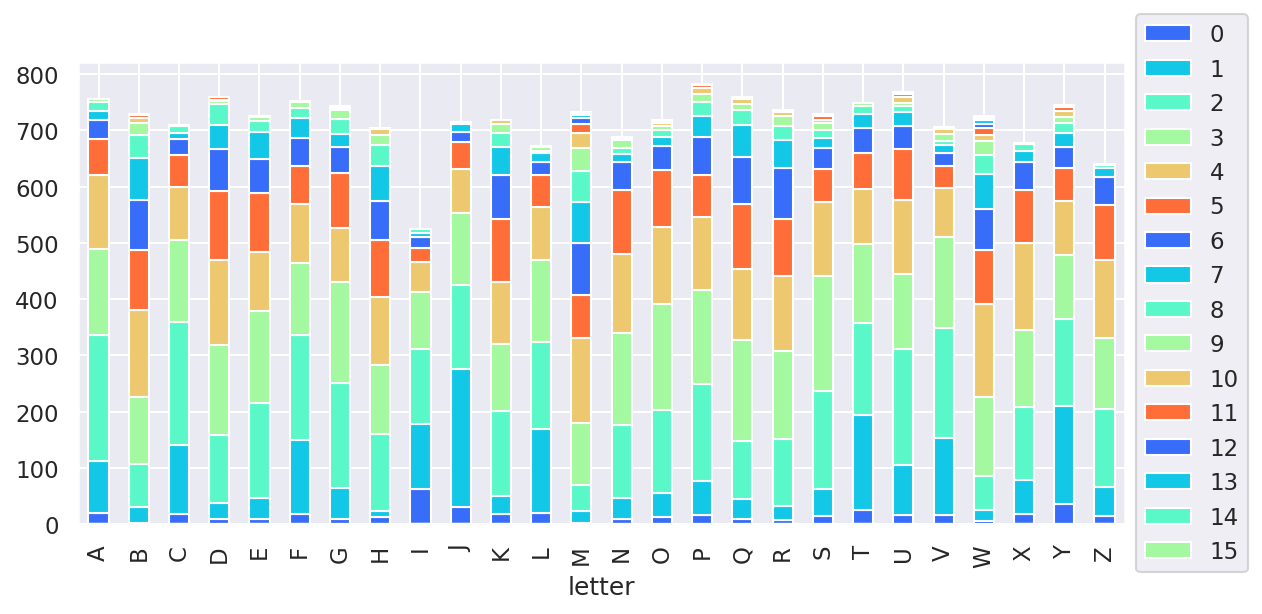

---------------------------------------------------------------------------------------------------


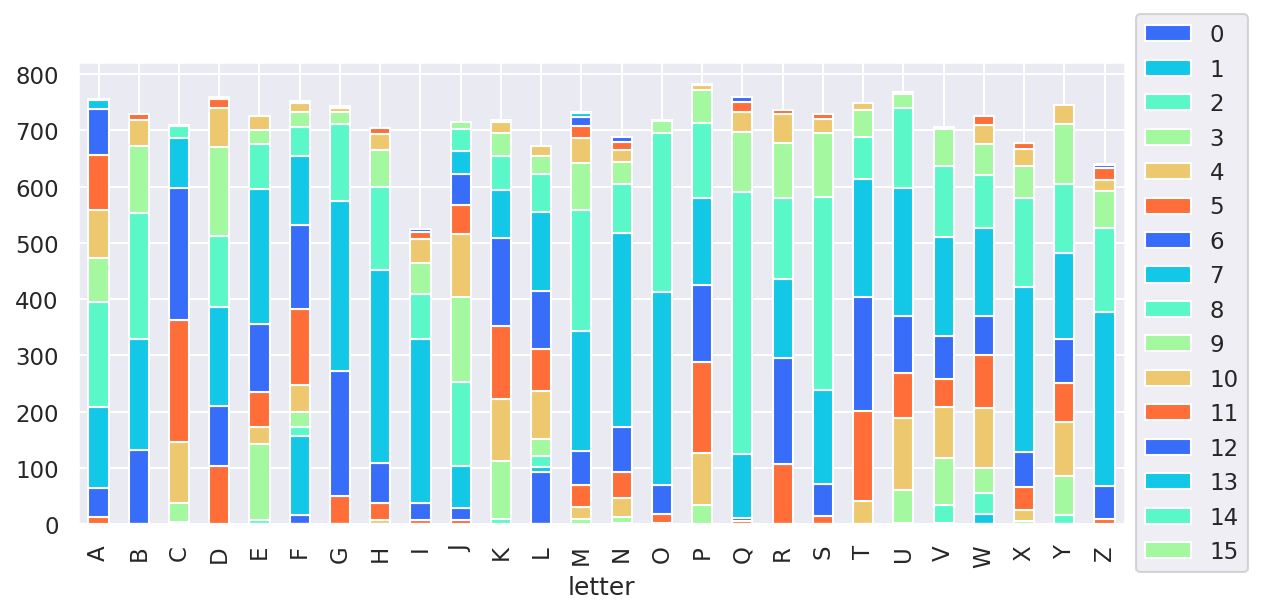

---------------------------------------------------------------------------------------------------


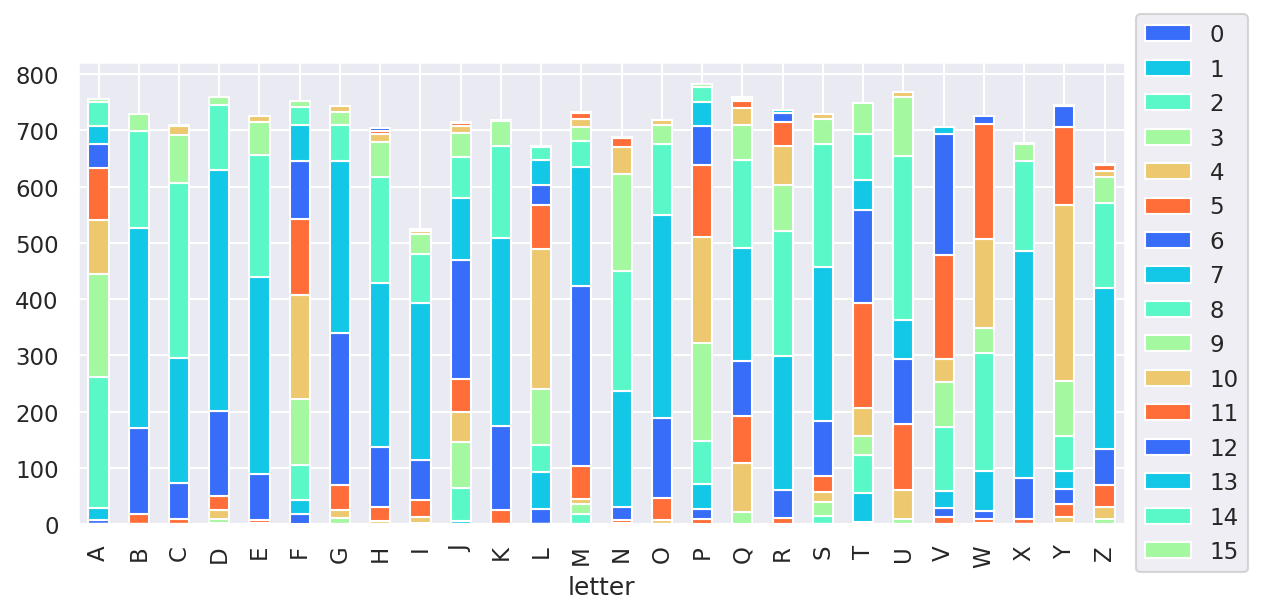

---------------------------------------------------------------------------------------------------


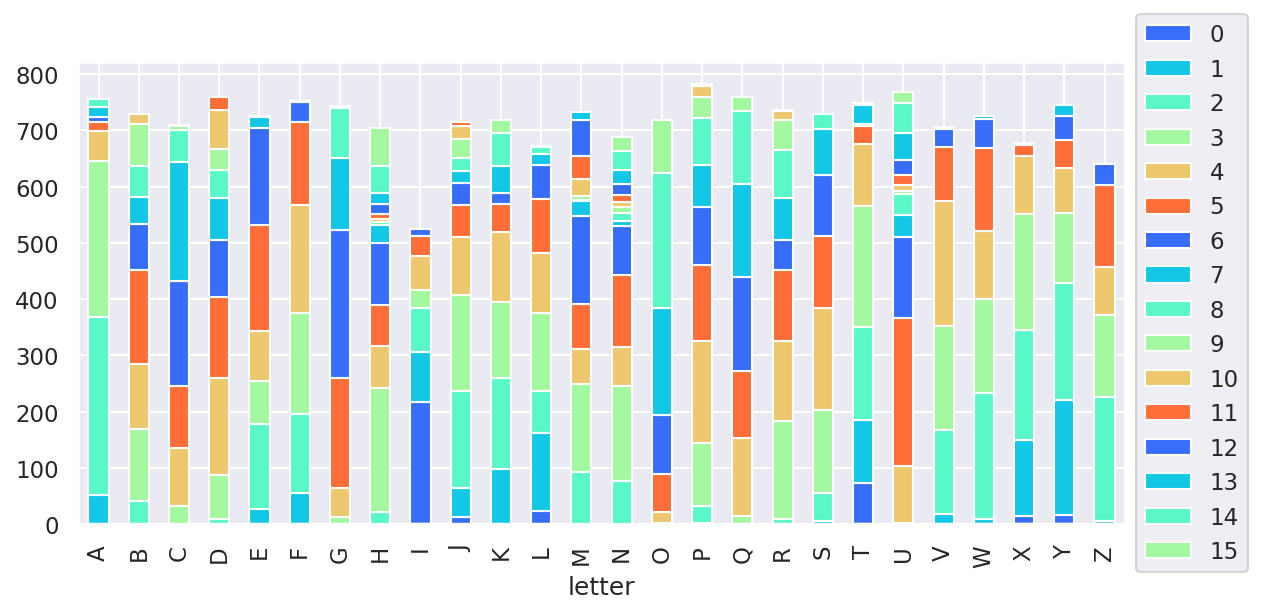

---------------------------------------------------------------------------------------------------


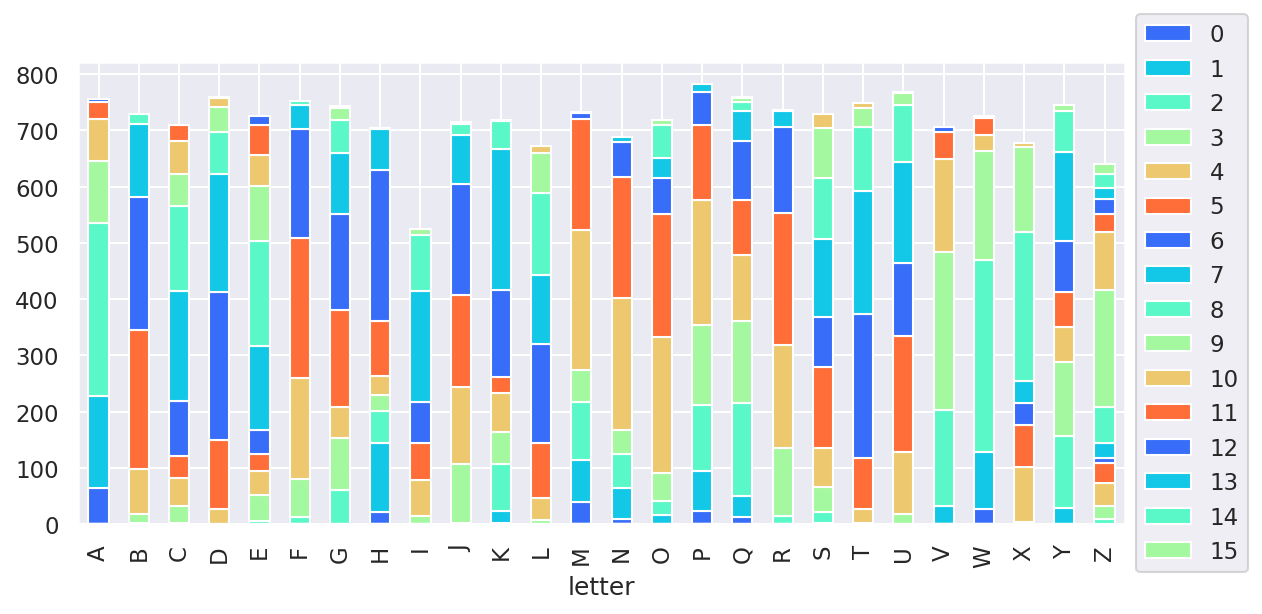

---------------------------------------------------------------------------------------------------


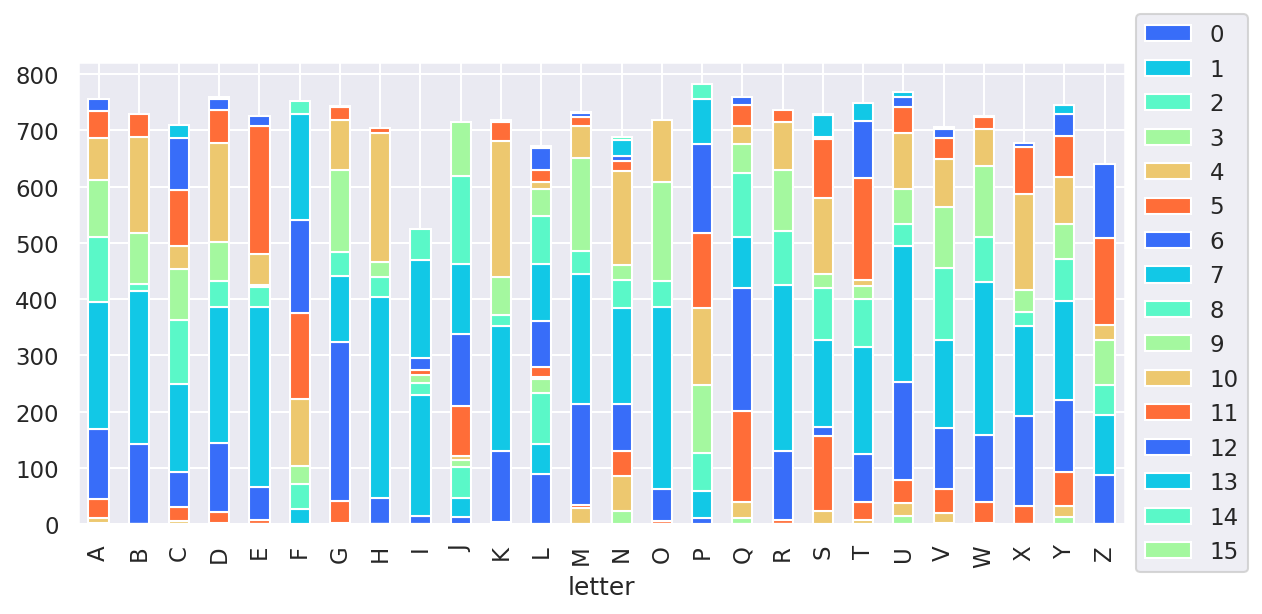

---------------------------------------------------------------------------------------------------


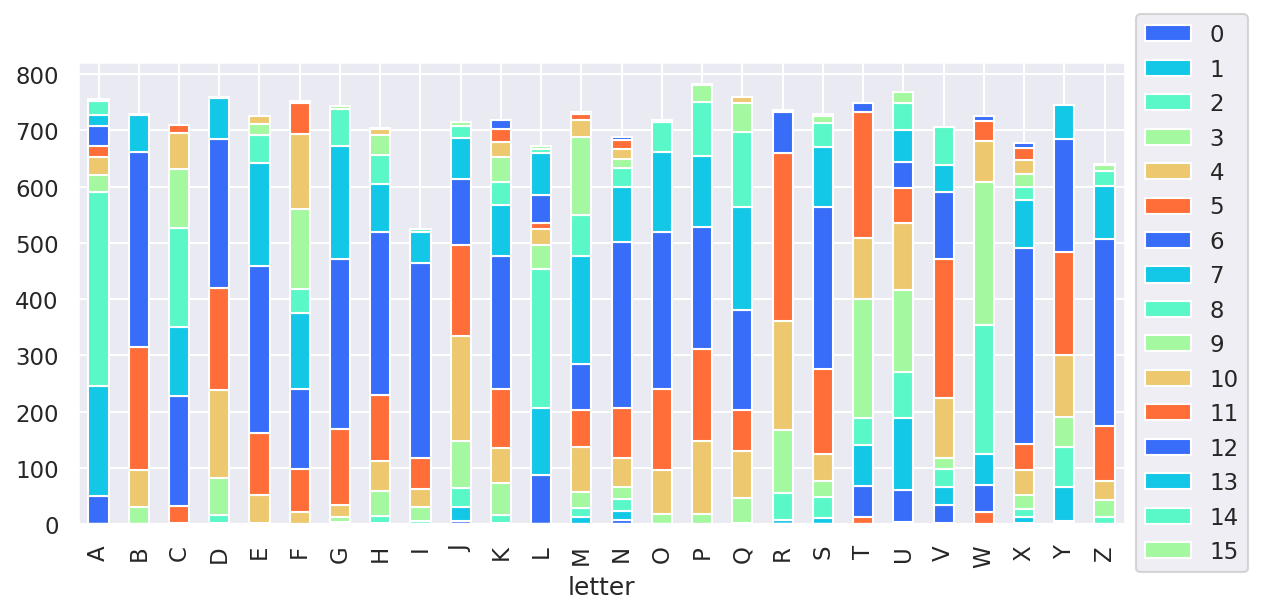

---------------------------------------------------------------------------------------------------


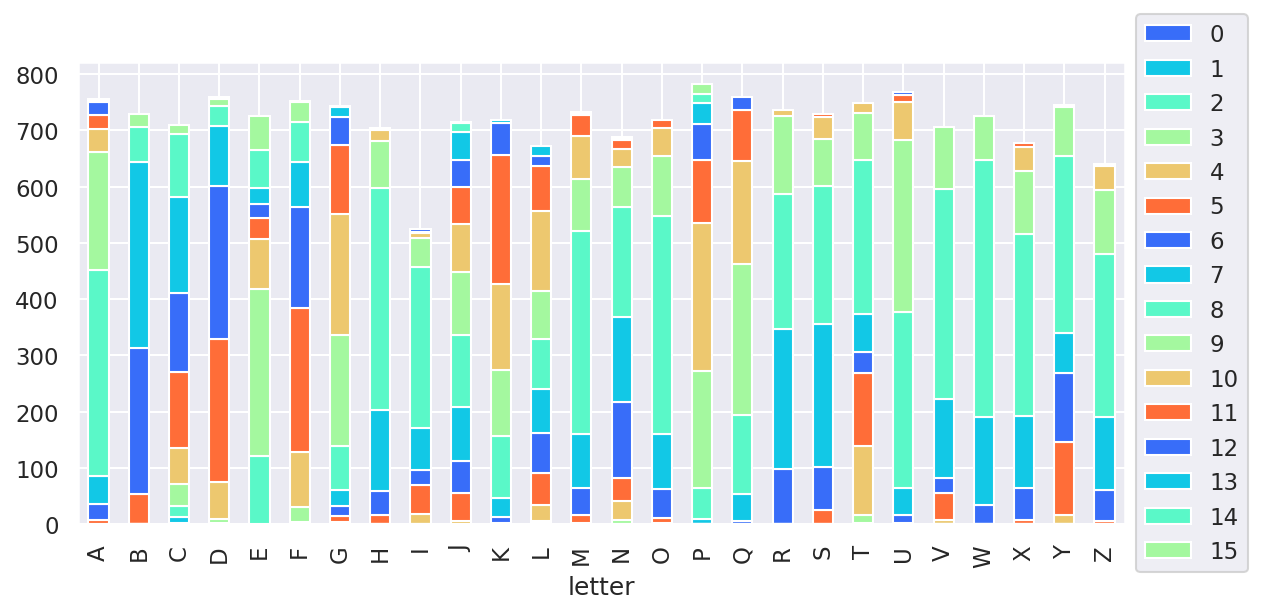

---------------------------------------------------------------------------------------------------


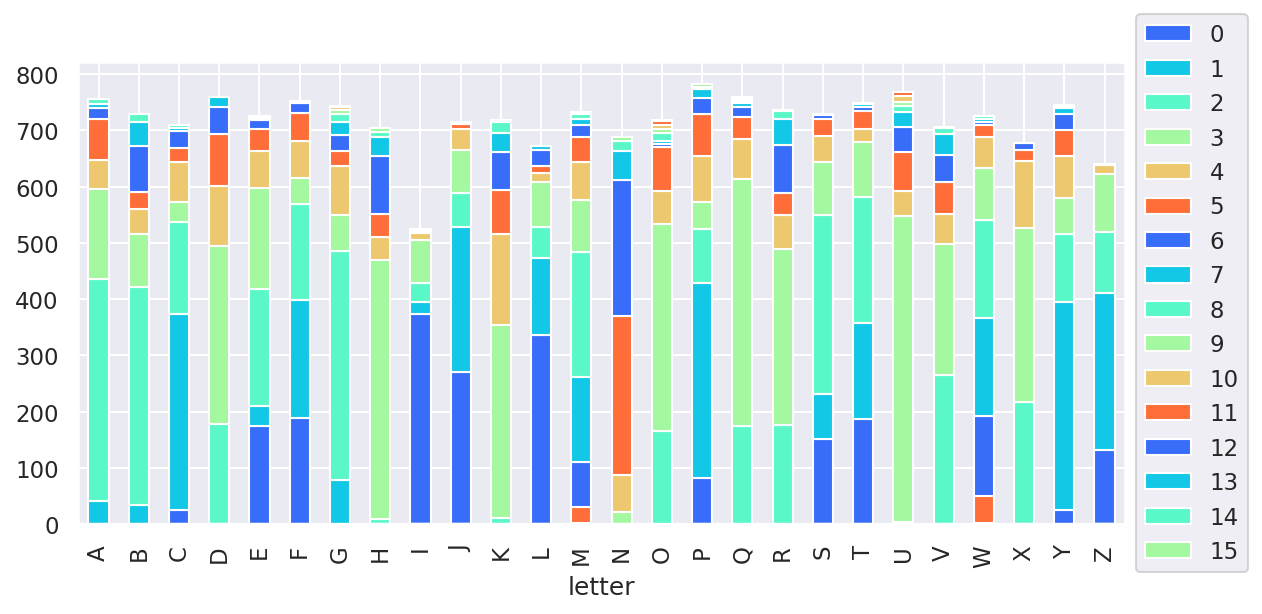

---------------------------------------------------------------------------------------------------


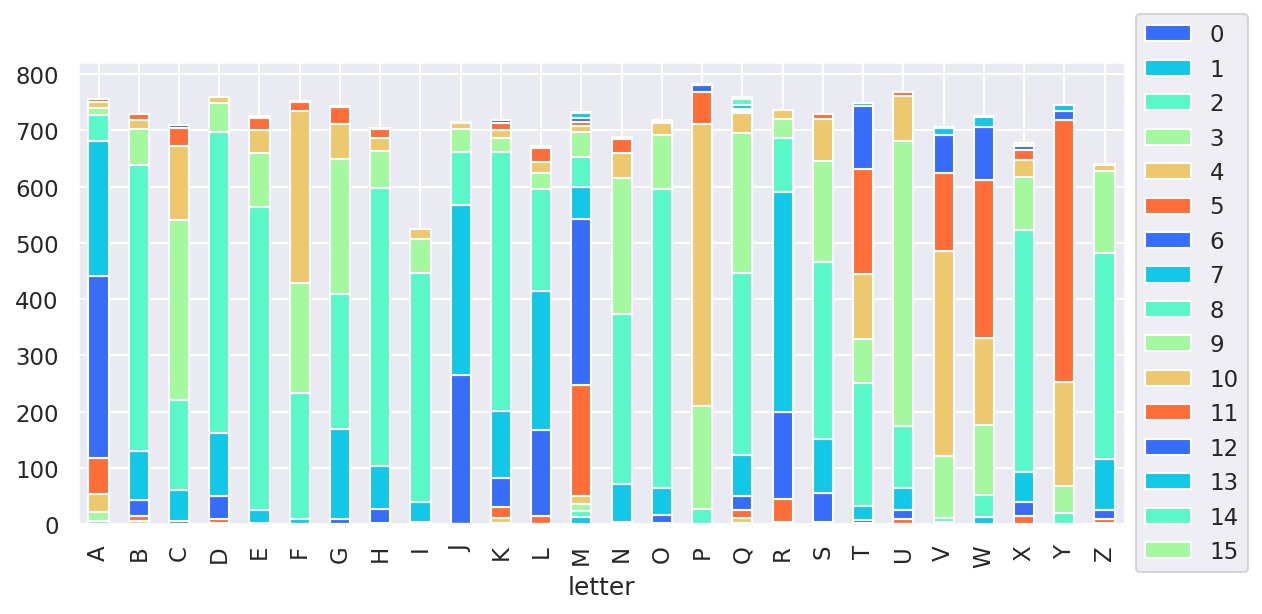

---------------------------------------------------------------------------------------------------


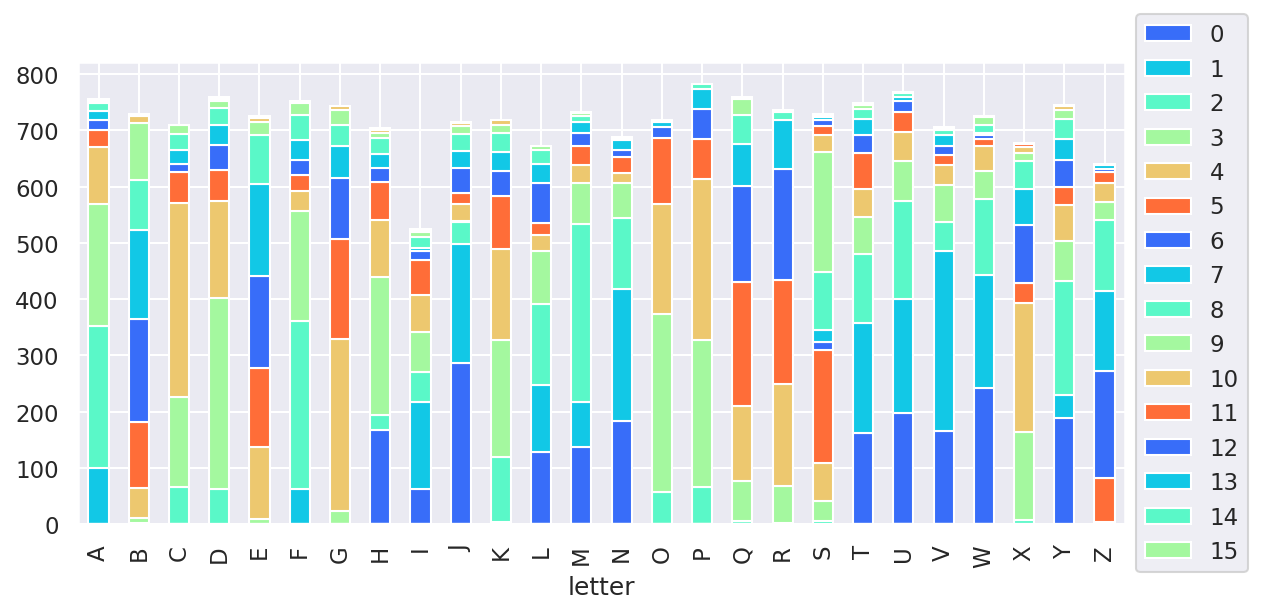

---------------------------------------------------------------------------------------------------


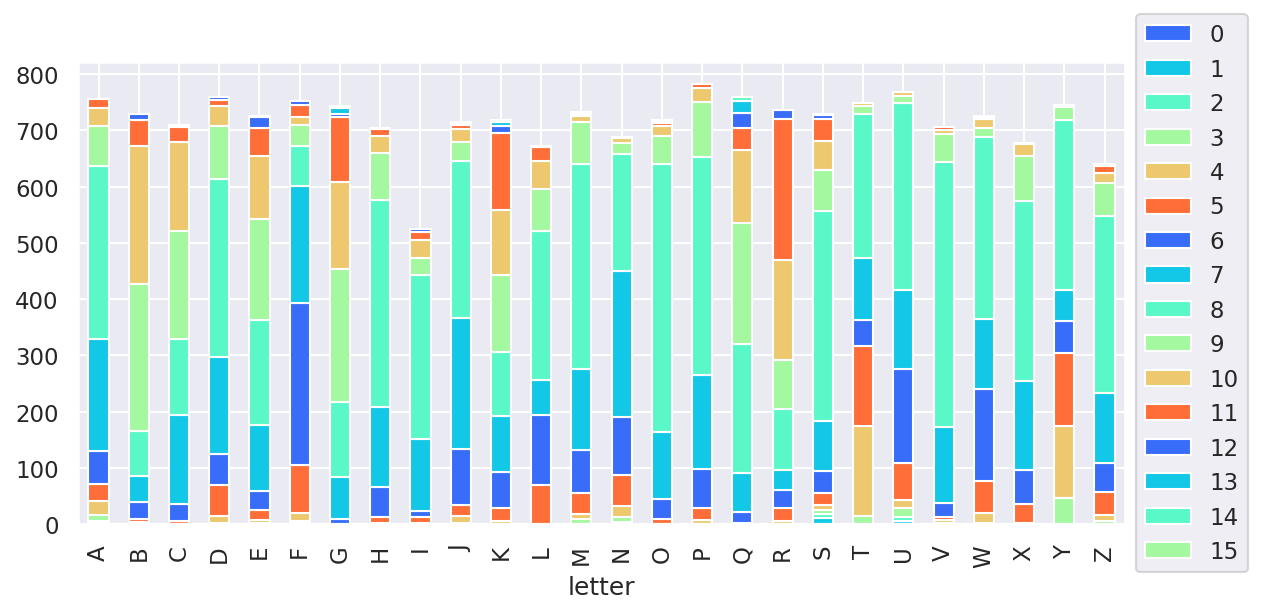

---------------------------------------------------------------------------------------------------


In [13]:
# @title $Groupby$
for col in num_columns:
  df.groupby(['letter', col]).size().unstack().plot(kind='bar', stacked=True)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()
  print('---------------------------------------------------------------------------------------------------')

In [14]:
# @title $Capping$
capping = "No" # @param ["Yes", "No"]
data = df.copy()


# function outlier_detection
def outlier_detection(data, col_name):
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3-Q1
    LE = Q1 - 1.5*IQR
    UE = Q3 + 1.5*IQR
    #return data.index[(data[col_name] < LE) | (data[col_name] > UE)].tolist()
    return LE,UE


outliers_columns = num_columns  # List of columns with outliers
LU_Extremes = {}  # Dictionary for lower and upper extreme
for col in outliers_columns:
    LU_Extremes[col] = outlier_detection(data, col)
LU_Extremes

if capping == "Yes":
    # Outliers Capping
    for col in LU_Extremes:
        data.loc[data[col] < LU_Extremes[col][0] , col]=LU_Extremes[col][0]
        data.loc[data[col] > LU_Extremes[col][1] , col]=LU_Extremes[col][1]

else:
    print("No Outliers Capping")

No Outliers Capping


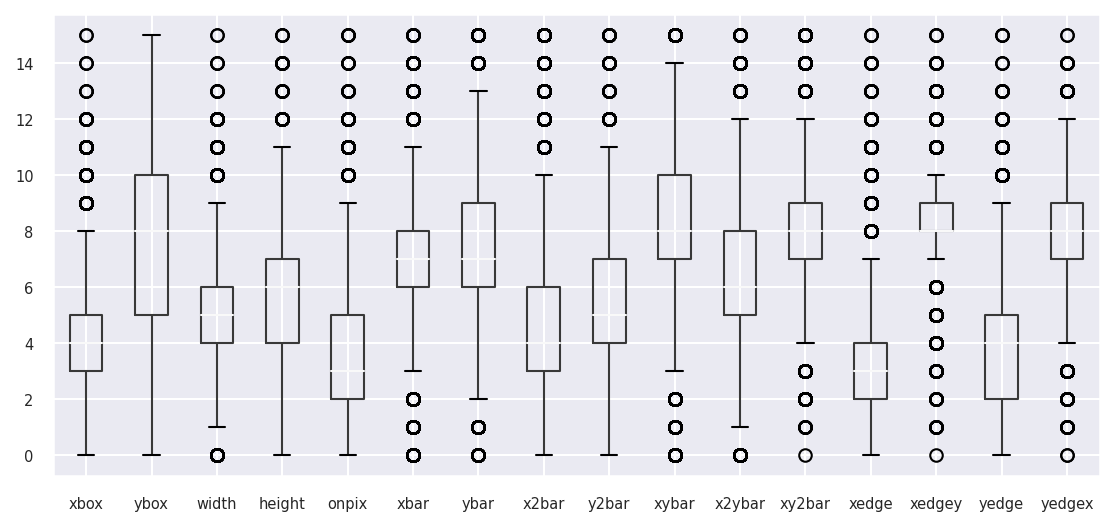

In [15]:
# @title $Boxplot$
data.boxplot(fontsize=7)
plt.show()

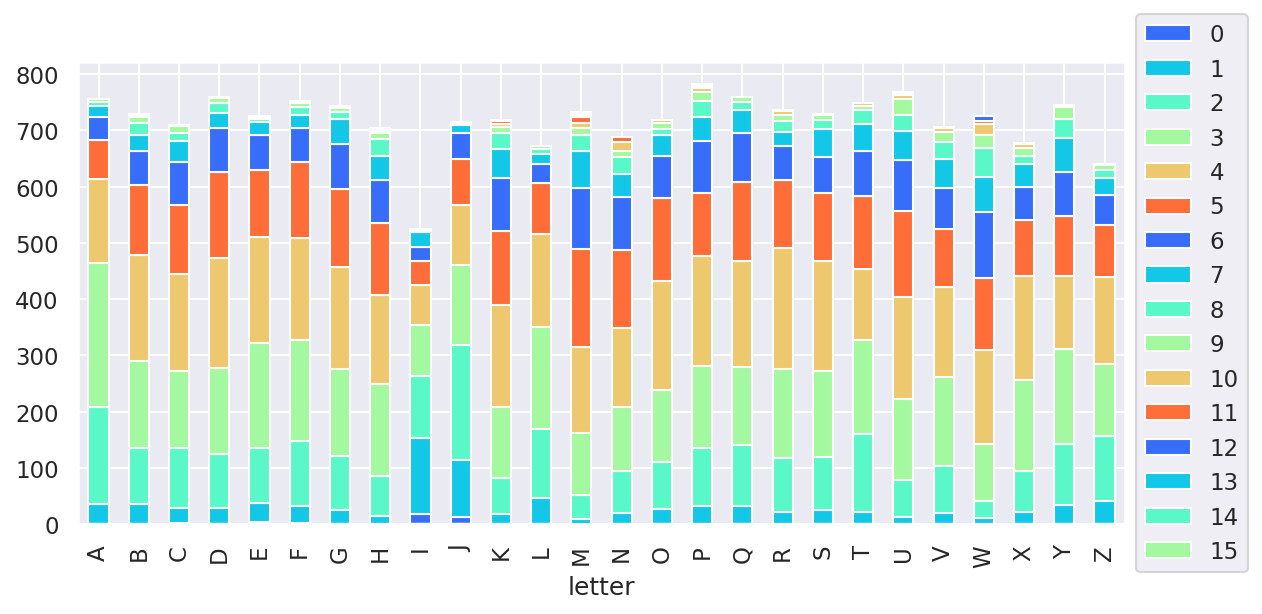

---------------------------------------------------------------------------------------------------


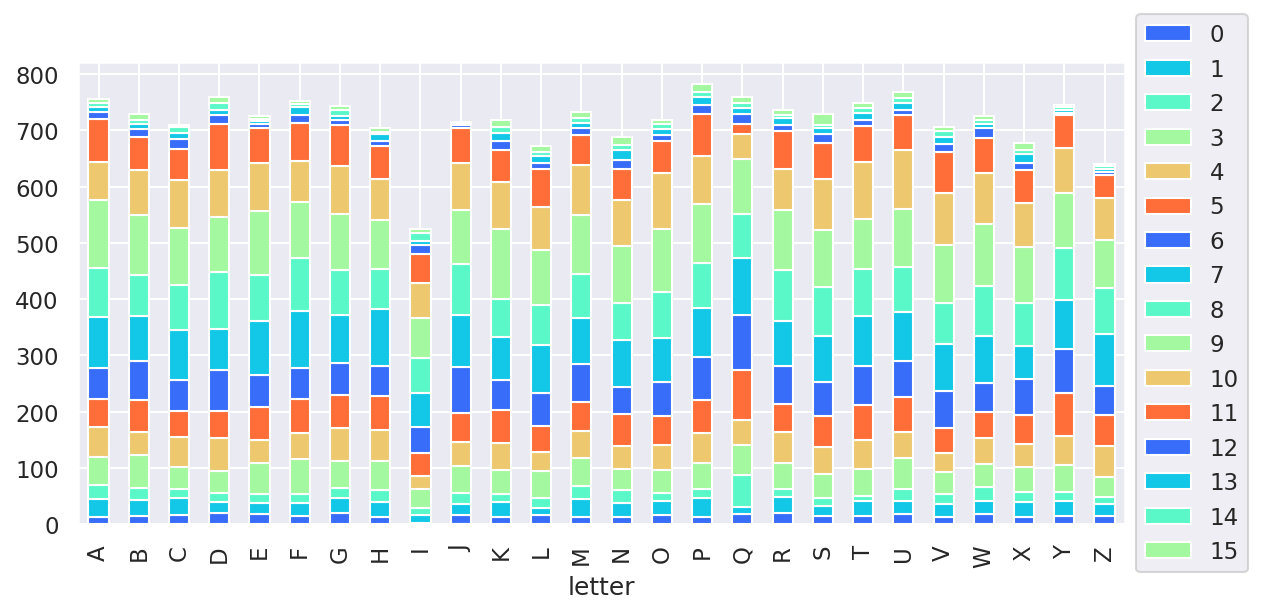

---------------------------------------------------------------------------------------------------


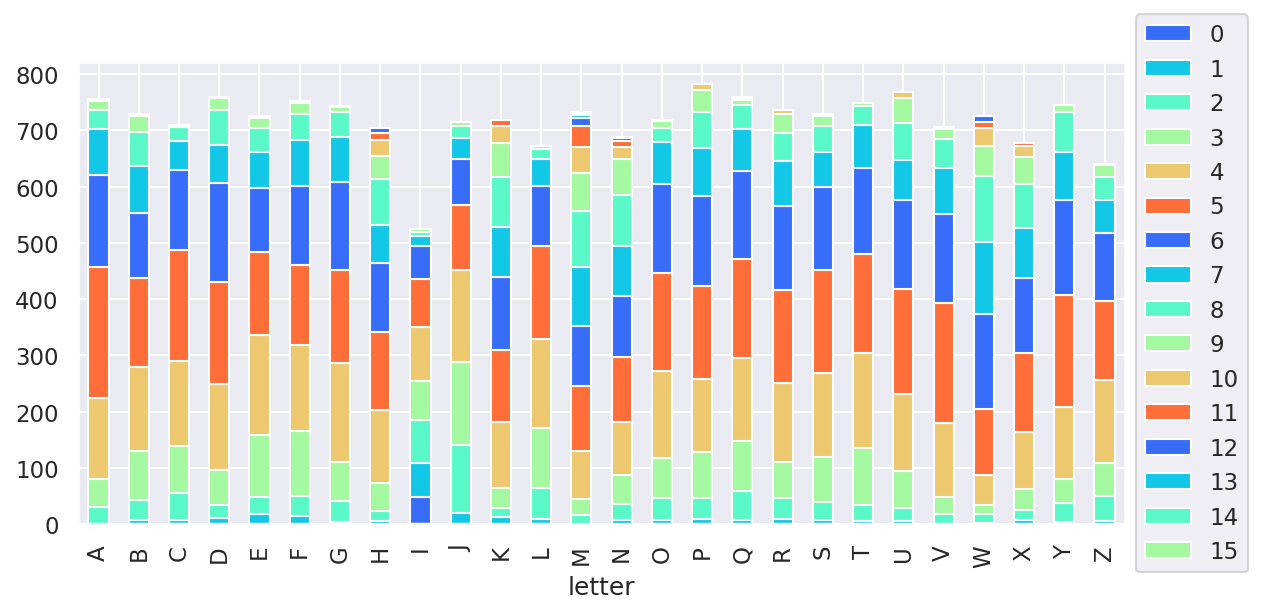

---------------------------------------------------------------------------------------------------


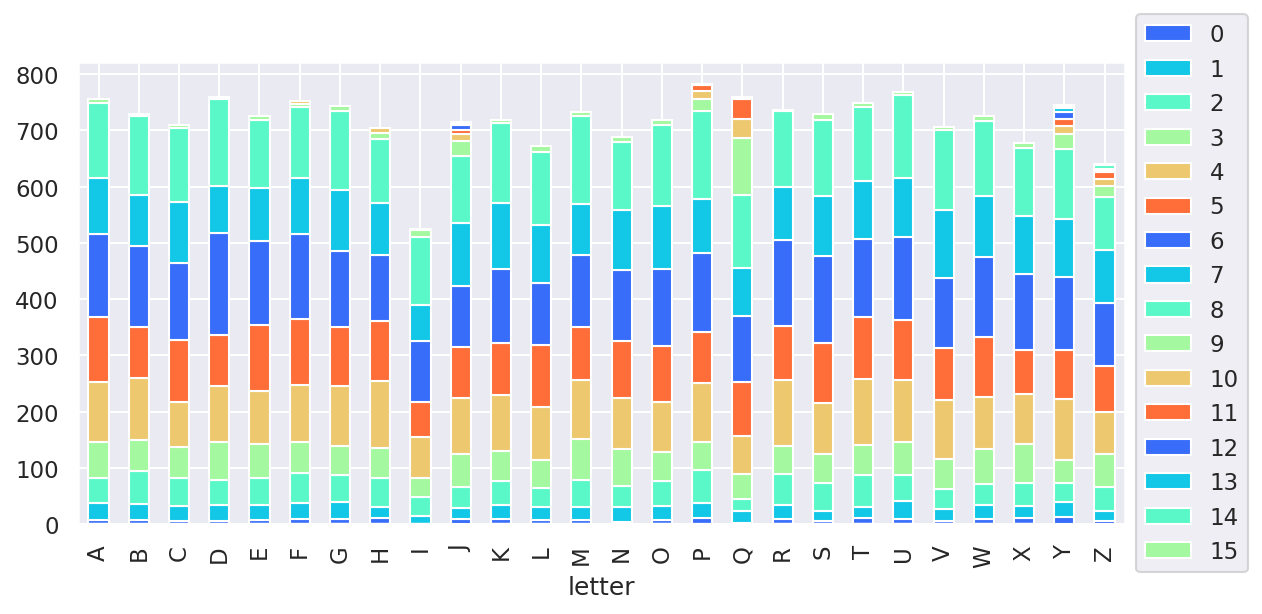

---------------------------------------------------------------------------------------------------


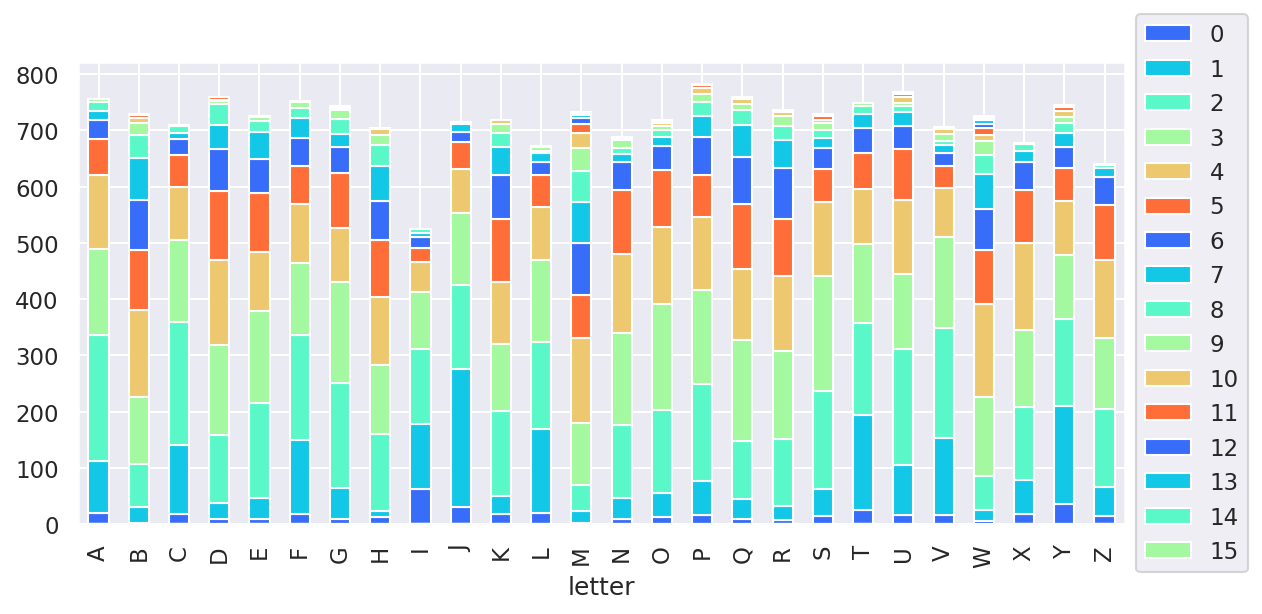

---------------------------------------------------------------------------------------------------


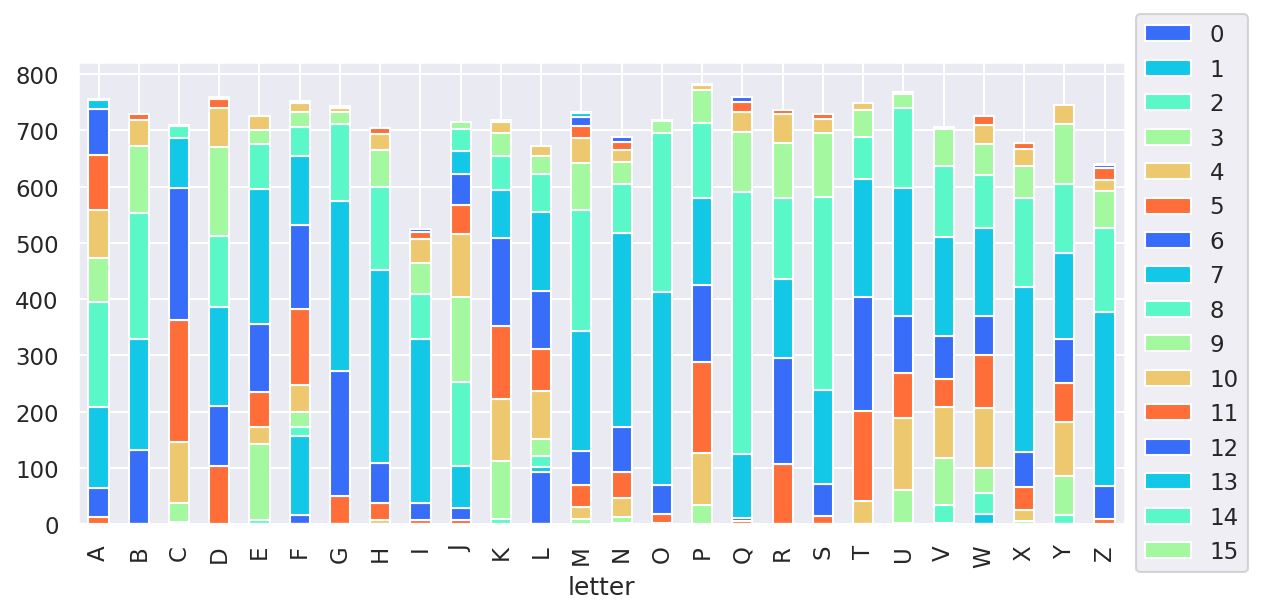

---------------------------------------------------------------------------------------------------


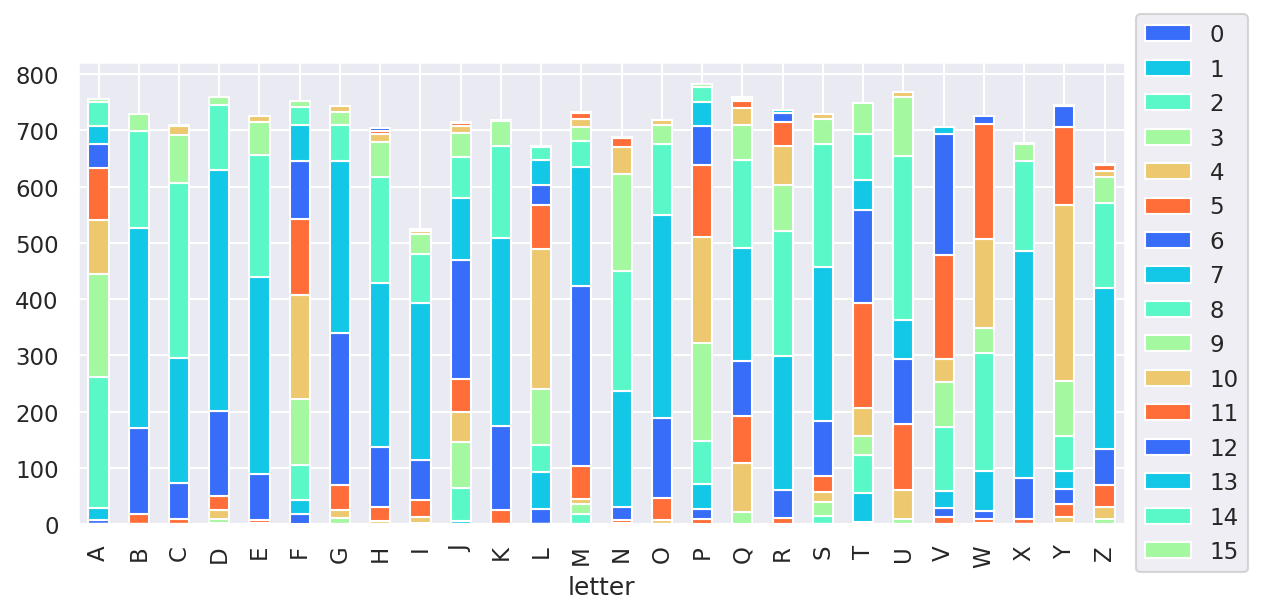

---------------------------------------------------------------------------------------------------


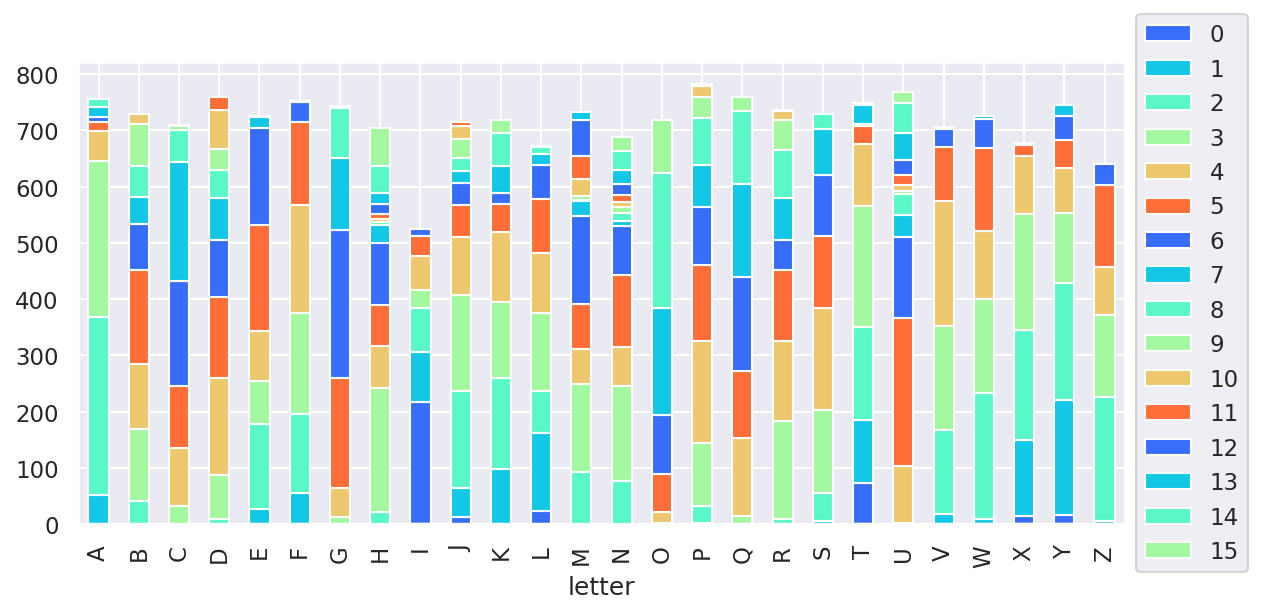

---------------------------------------------------------------------------------------------------


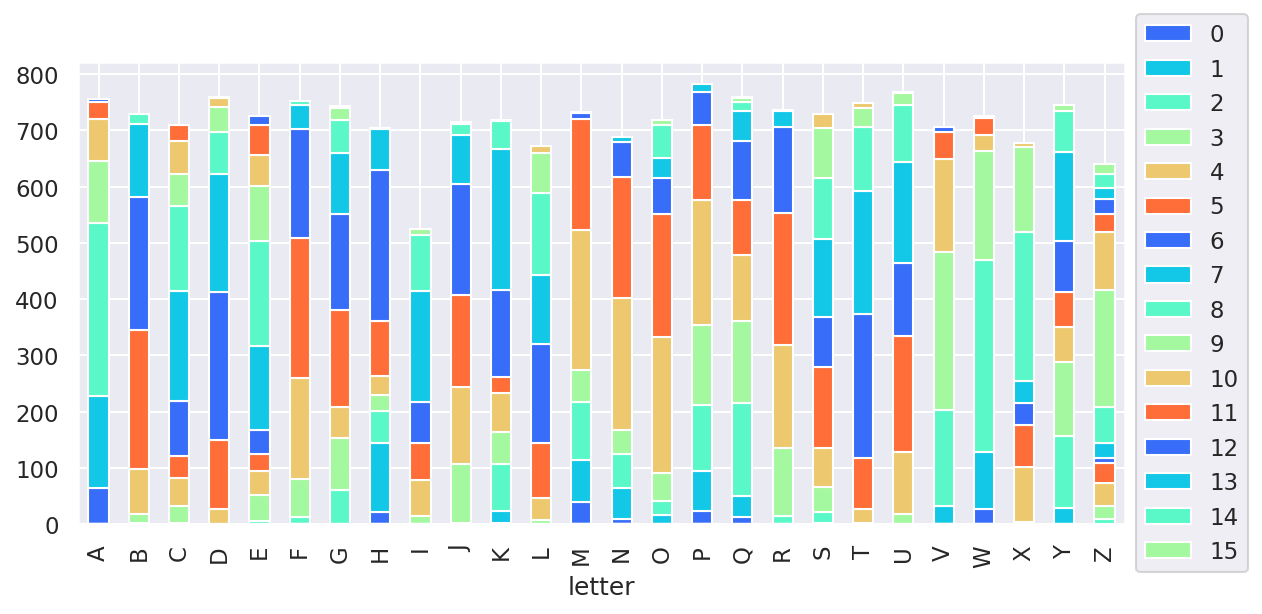

---------------------------------------------------------------------------------------------------


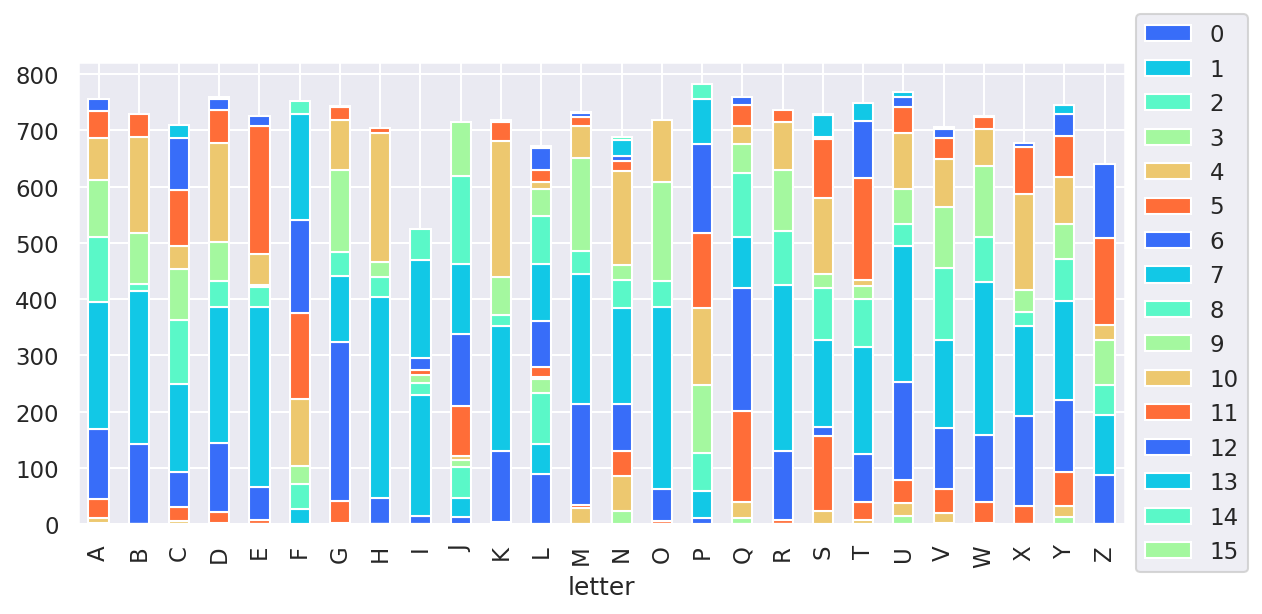

---------------------------------------------------------------------------------------------------


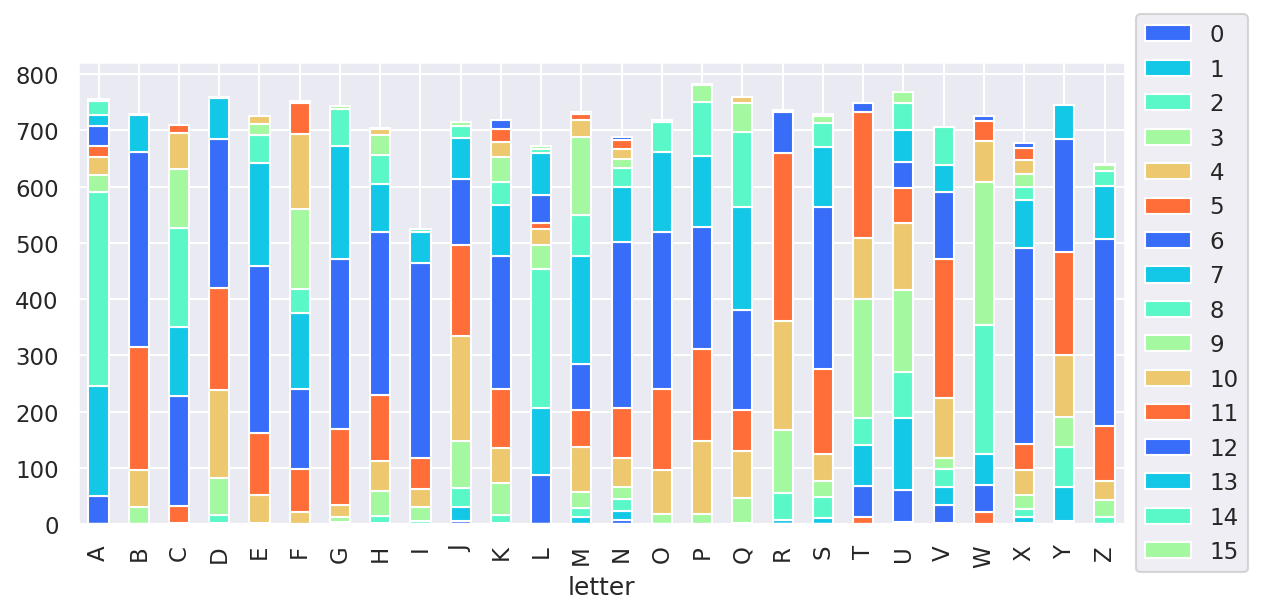

---------------------------------------------------------------------------------------------------


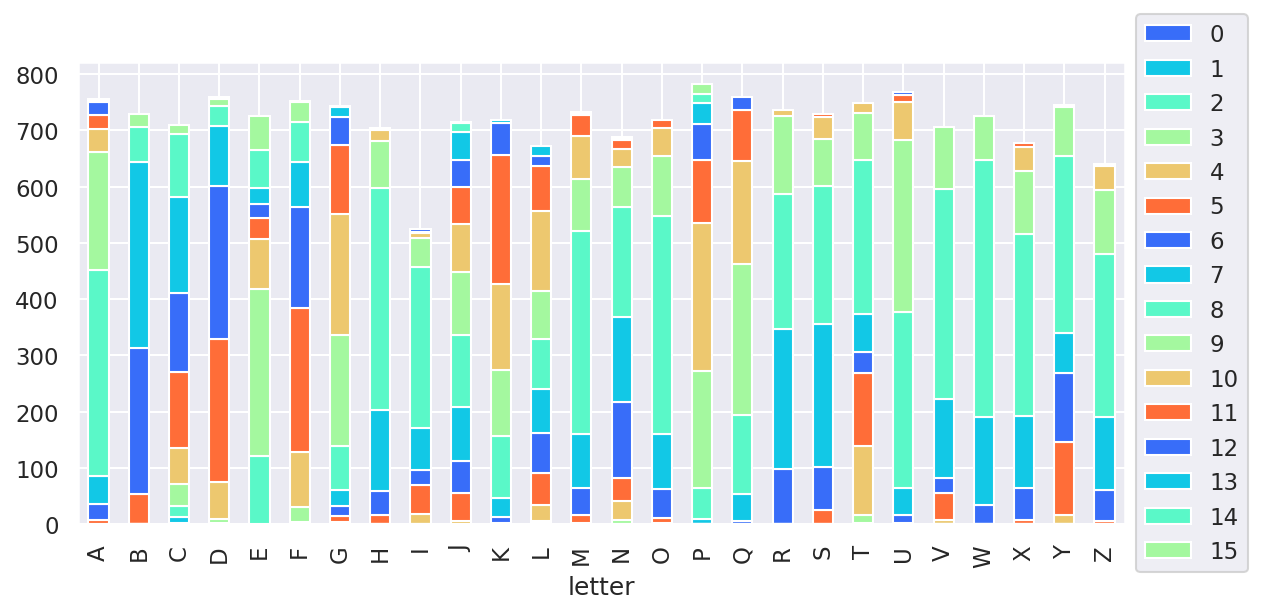

---------------------------------------------------------------------------------------------------


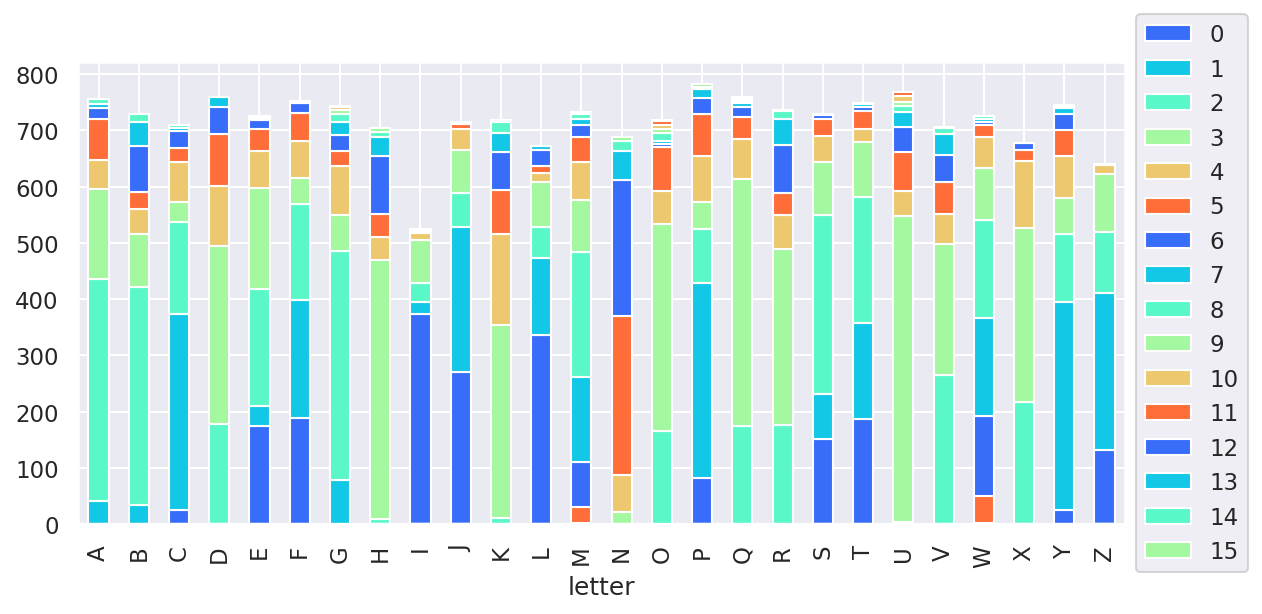

---------------------------------------------------------------------------------------------------


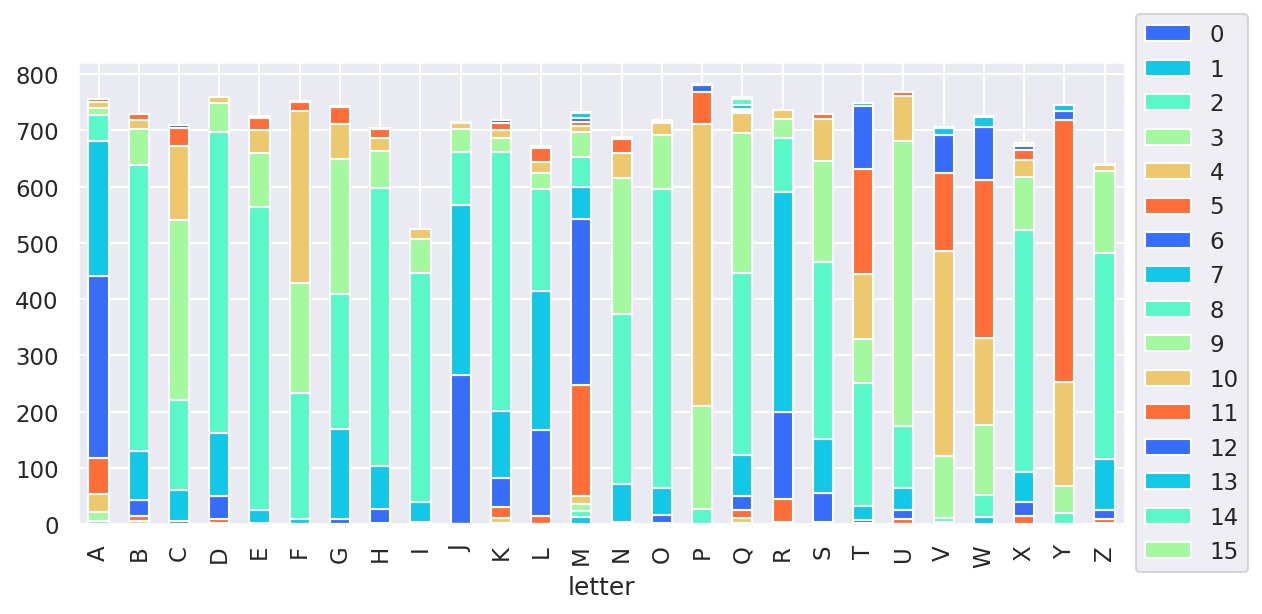

---------------------------------------------------------------------------------------------------


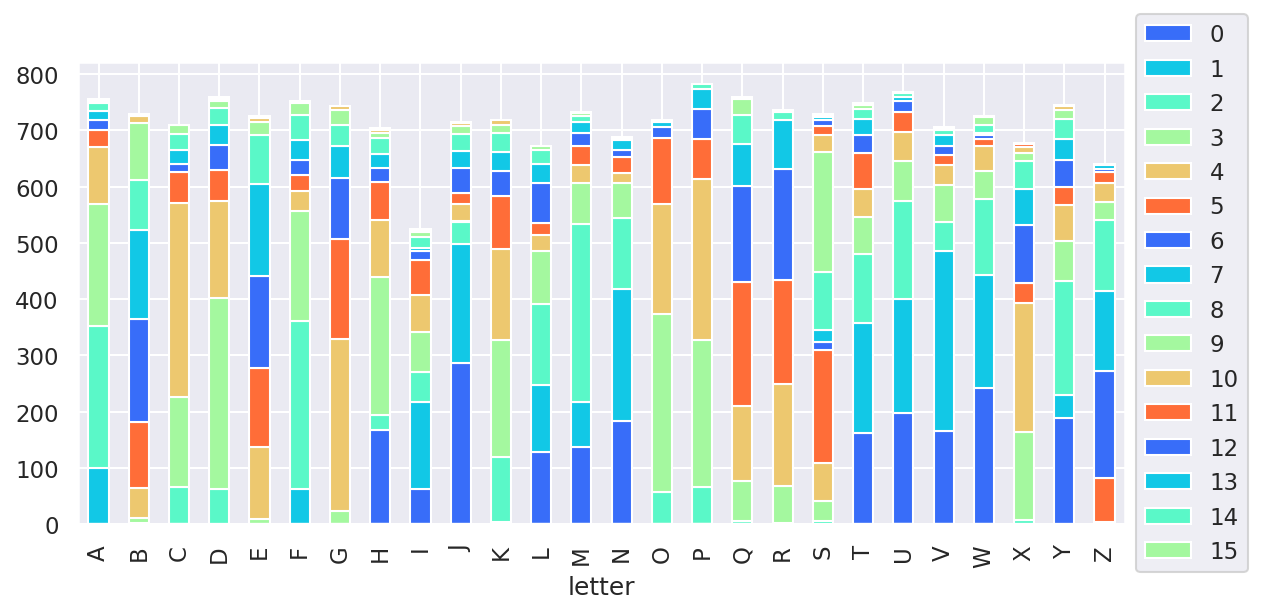

---------------------------------------------------------------------------------------------------


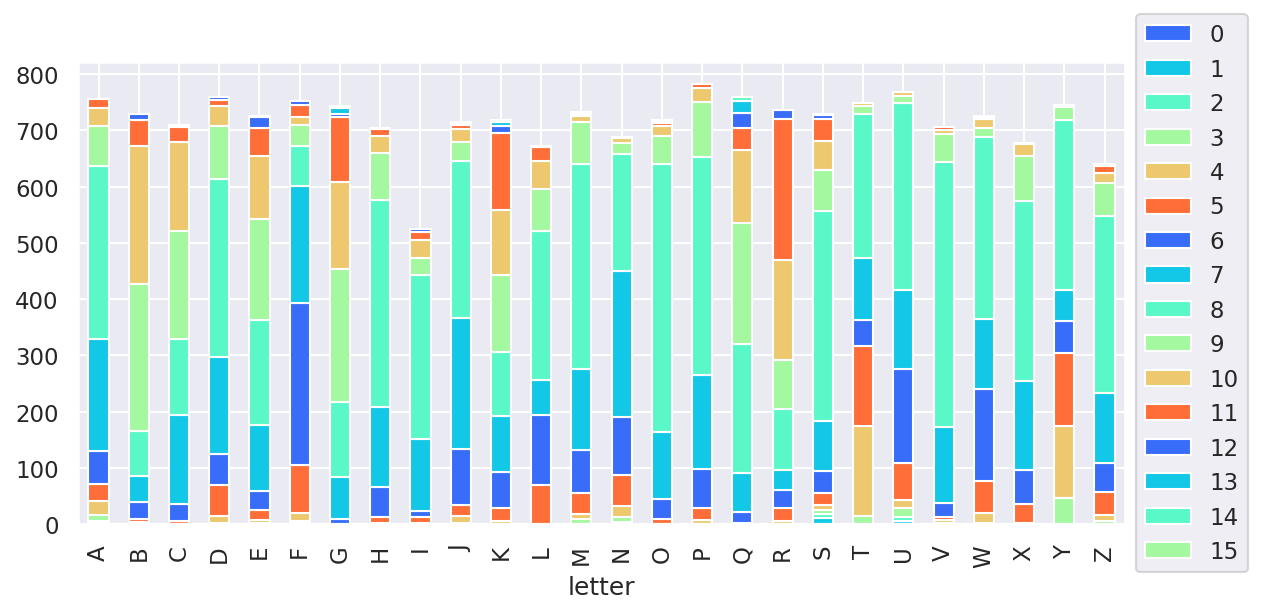

---------------------------------------------------------------------------------------------------


In [16]:
# @title $Groupby$
for col in num_columns:
  data.groupby(['letter', col]).size().unstack().plot(kind='bar', stacked=True)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.show()
  print('---------------------------------------------------------------------------------------------------')

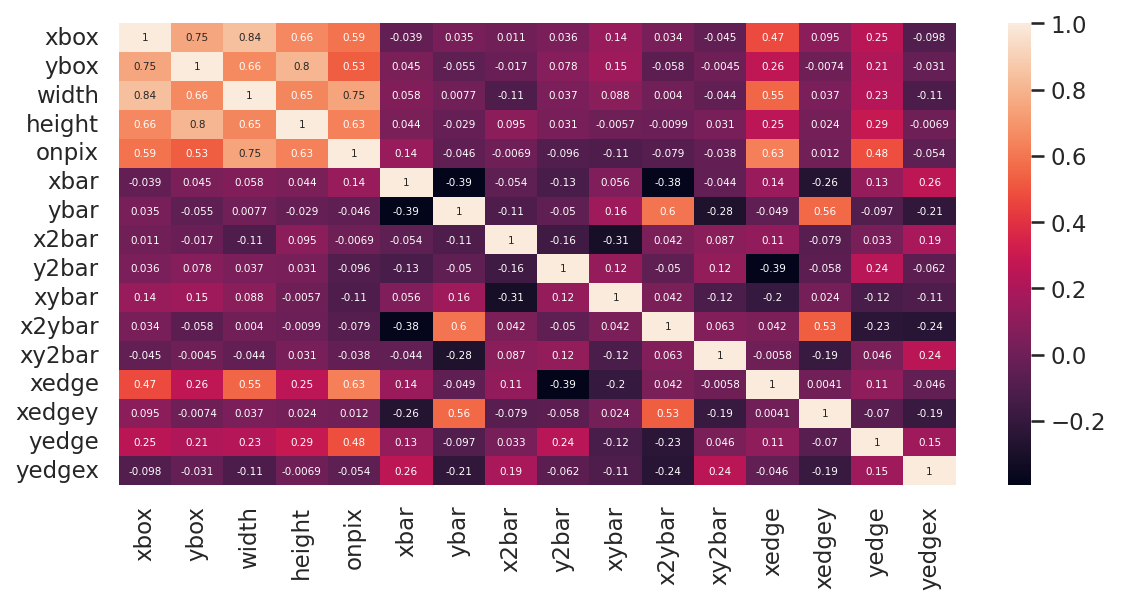

In [17]:
# @title $Correlation \ \ \& \ \ Heatmap$
corr = data[num_columns].corr()
sns.heatmap(corr, annot=True, annot_kws={"size": 5})
plt.show()

In [18]:
# @title $Label \ \ Encoding$
from sklearn.preprocessing import LabelEncoder
ec_df = data.copy()
le = LabelEncoder()
ec_df['letter'] = le.fit_transform(ec_df['letter'])

print("Encoded DataFrame :")
ec_df

Encoded DataFrame :


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [19]:
# @title $Separate \ \ Independent \ \ Features \ (X) \ \ \& \ \ Dependent \ \ Feature \ (y)$
X = ec_df.drop('letter', axis=1)
y = ec_df['letter']
print("Shapes")
print("X :", X.shape)
print("y :", y.shape)

Shapes
X : (18668, 16)
y : (18668,)


In [20]:
# @title $Feature Scalling$
scalling_type = "Standard" # @param ["Standard", "MinMax"]

if scalling_type == "Standard":
    scaler = StandardScaler()

elif scalling_type == "MinMax":
    scaler = MinMaxScaler()

scalled_X = scaler.fit_transform(X)
scalled_X = pd.DataFrame(scalled_X, columns=X.columns)

scalled_X.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04,1.866800e+04
mean,1.583382e-16,1.035288e-16,1.826979e-17,1.796530e-16,9.896138e-17,1.400684e-16,-8.563966e-17,1.583382e-16,9.667766e-17,-2.890814e-16,1.484421e-16,-6.813111e-17,6.280242e-17,-7.993035e-18,1.979228e-17,2.055352e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-2.208599e+00,-2.272675e+00,-2.728755e+00,-2.528154e+00,-1.694330e+00,-3.404919e+00,-3.245754e+00,-1.746100e+00,-2.241927e+00,-3.383441e+00,-2.458544e+00,-3.761249e+00,-1.347535e+00,-5.303388e+00,-1.494712e+00,-4.696993e+00
25%,-6.123265e-01,-7.040845e-01,-6.614736e-01,-6.918037e-01,-7.686173e-01,-4.524129e-01,-6.592928e-01,-6.035232e-01,-5.178190e-01,-5.481003e-01,-5.534933e-01,-4.388327e-01,-4.868905e-01,-2.234123e-01,-7.073732e-01,-4.732903e-01
50%,-8.023549e-02,2.370700e-01,-1.446532e-01,2.263714e-01,-3.057609e-01,3.967147e-02,-2.282158e-01,-2.226642e-01,-8.679188e-02,-1.430515e-01,-1.724832e-01,3.579817e-02,-5.656800e-02,-2.234123e-01,7.996539e-02,1.300958e-01
75%,4.518555e-01,8.645063e-01,3.721671e-01,6.854589e-01,6.199519e-01,5.317558e-01,6.339380e-01,5.390538e-01,7.752623e-01,6.670459e-01,5.895370e-01,5.104290e-01,3.737545e-01,4.115847e-01,4.736347e-01,7.334820e-01
max,5.772765e+00,2.433097e+00,5.023550e+00,4.358159e+00,5.248516e+00,3.976346e+00,3.220400e+00,3.966785e+00,4.223479e+00,2.692289e+00,3.256607e+00,3.358214e+00,5.107302e+00,4.221567e+00,4.410328e+00,4.353799e+00


#**2. Model Implementation**
●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.

●	Divide the dataset into training and test sets.

●	Train your model on the training set and then use it to make predictions on the test set.


In [21]:
# @title $Train-Test \ \ Split$
X_train,X_test,y_train,y_test = train_test_split(scalled_X,y,test_size=0.2,random_state=1)
print("Shapes")
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)

Shapes
X_train : (14934, 16)
X_test  : (3734, 16)
y_train : (14934,)
y_test  : (3734,)


In [22]:
# @title $Model$
# @markdown $Create \ a \ sequential \ model$
model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[X_train.shape[1]]), # Add a Flatten layer to convert the input data into a 1D array
tf.keras.layers.Dense(300, activation="relu"), # Add a Dense layer with 300 neurons and ReLU activation
tf.keras.layers.Dense(100, activation="relu"), # Add a Dense layer with 100 neurons and ReLU activation
tf.keras.layers.Dense(26, activation="softmax") # Add a Dense layer with 26 neurons (corresponding to the number of classes) and softmax activation
])

In [23]:
# @title $model.compile$
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [24]:
# @title $model.fit$
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
467/467 [==============================] - 4s 7ms/step - loss: 2.8754 - accuracy: 0.2752 - val_loss: 2.4372 - val_accuracy: 0.4226
Epoch 2/30
467/467 [==============================] - 2s 3ms/step - loss: 2.0441 - accuracy: 0.5132 - val_loss: 1.7220 - val_accuracy: 0.5745
Epoch 3/30
467/467 [==============================] - 2s 4ms/step - loss: 1.5063 - accuracy: 0.6335 - val_loss: 1.3568 - val_accuracy: 0.6484
Epoch 4/30
467/467 [==============================] - 2s 3ms/step - loss: 1.2380 - accuracy: 0.6878 - val_loss: 1.1663 - val_accuracy: 0.6853
Epoch 5/30
467/467 [==============================] - 2s 3ms/step - loss: 1.0835 - accuracy: 0.7181 - val_loss: 1.0452 - val_accuracy: 0.7097
Epoch 6/30
467/467 [==============================] - 2s 3ms/step - loss: 0.9786 - accuracy: 0.7403 - val_loss: 0.9505 - val_accuracy: 0.7362
Epoch 7/30
467/467 [==============================] - 2s 3ms/step - loss: 0.9000 - accuracy: 0.7562 - val_loss: 0.8816 - val_accuracy: 0.7499
Epoch 

In [25]:
# @title $model.evaluate$
# @markdown $\bigl[ loss,  \ accuracy \bigr]$
model.evaluate(X_test, y_test)

117/117 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8856


[0.3834051191806793, 0.8856454491615295]

In [26]:
# @title $Classification \ \ Report$
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

59/59 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       153
           1       0.84      0.90      0.87       138
           2       0.93      0.83      0.88       133
           3       0.83      0.94      0.88       155
           4       0.74      0.88      0.80       131
           5       0.90      0.80      0.85       153
           6       0.77      0.92      0.84       131
           7       0.89      0.76      0.82       131
           8       0.93      0.80      0.86       106
           9       0.97      0.91      0.94       159
          10       0.84      0.78      0.81       129
          11       0.97      0.88      0.92       132
          12       0.93      0.93      0.93       151
          13       0.91      0.89      0.90       156
          14       0.84      0.84      0.84       154
          15       0.89      0.90      0.90       175
          16       0.90     

# $Hyperparameter \ \ Tunning$

In [27]:
# @title $Model$
def model_builder(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=[X_train.shape[1]]))


    hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=1000, step=100)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=1000, step=100)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
    model.add(tf.keras.layers.Dense(units=26, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = hp_learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

    return model

In [28]:
# @title $Tuner$
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x')

In [29]:
# @title $Stop \ \ Early$
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [30]:
# @title $tuner.search$
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 30 Complete [00h 00m 40s]
val_accuracy: 0.8687646389007568

Best val_accuracy So Far: 0.9581519961357117
Total elapsed time: 00h 09m 58s


In [31]:
# @title $Get \ \ best \ \ Hyperparameters$
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'activation': 'relu',
 'layer_1': 401,
 'layer_2': 901,
 'learning_rate': 0.001,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [32]:
# @title $Model \ \ with \ \ best \ \ Hyperparameters$
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2,
                    callbacks=[stop_early])

Epoch 1/50
374/374 [==============================] - 5s 11ms/step - loss: 0.9335 - accuracy: 0.7277 - val_loss: 0.5342 - val_accuracy: 0.8430
Epoch 2/50
374/374 [==============================] - 5s 12ms/step - loss: 0.3946 - accuracy: 0.8774 - val_loss: 0.3430 - val_accuracy: 0.8932
Epoch 3/50
374/374 [==============================] - 6s 16ms/step - loss: 0.2617 - accuracy: 0.9172 - val_loss: 0.3048 - val_accuracy: 0.9039
Epoch 4/50
374/374 [==============================] - 4s 10ms/step - loss: 0.2003 - accuracy: 0.9345 - val_loss: 0.2210 - val_accuracy: 0.9274
Epoch 5/50
374/374 [==============================] - 4s 11ms/step - loss: 0.1445 - accuracy: 0.9512 - val_loss: 0.1892 - val_accuracy: 0.9384
Epoch 6/50
374/374 [==============================] - 5s 14ms/step - loss: 0.1186 - accuracy: 0.9624 - val_loss: 0.1753 - val_accuracy: 0.9401
Epoch 7/50
374/374 [==============================] - 4s 9ms/step - loss: 0.1045 - accuracy: 0.9649 - val_loss: 0.1711 - val_accuracy: 0.9461


<Axes: >

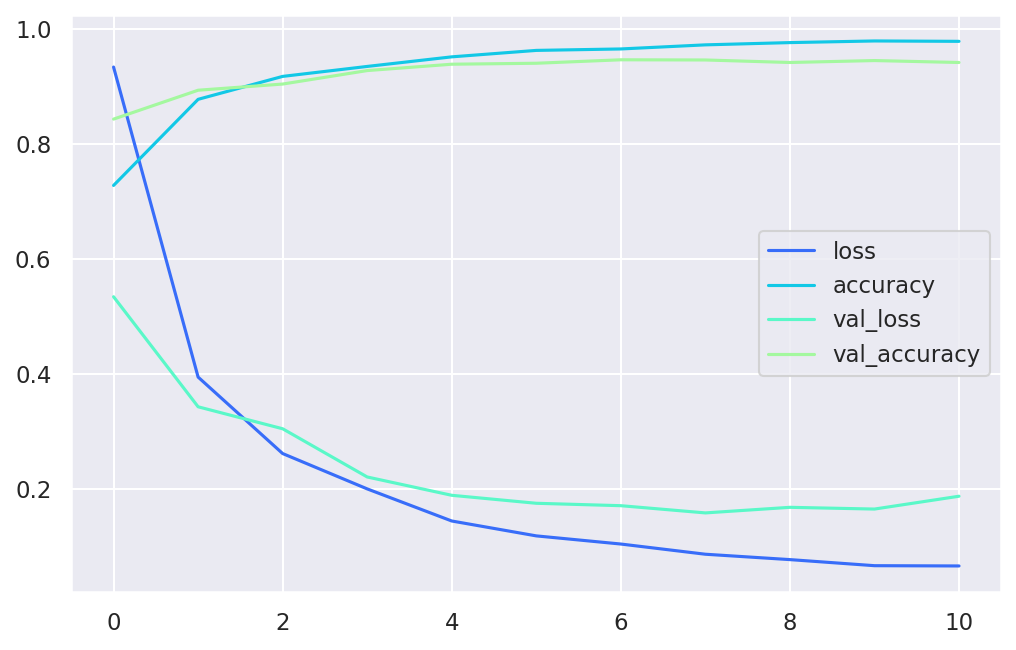

In [33]:
# @title $Visualization$
# @markdown $visualize \ the \ training \ and \ validation \ performance \ of \ model $
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [34]:
# @title $model.evaluate$
# @markdown $\bigl[ loss,  \ accuracy \bigr]$
model.evaluate(X_test, y_test)

117/117 [==============================] - 1s 4ms/step - loss: 0.1810 - accuracy: 0.9456


[0.1809697449207306, 0.9456347227096558]

In [35]:
# @title $Classification \ \ Report$

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

59/59 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       153
           1       0.87      0.93      0.90       138
           2       0.96      0.95      0.96       133
           3       0.95      1.00      0.97       155
           4       0.96      0.92      0.94       131
           5       0.94      0.72      0.81       153
           6       0.84      0.98      0.91       131
           7       0.90      0.98      0.93       131
           8       0.96      0.91      0.93       106
           9       0.97      0.96      0.97       159
          10       0.95      0.91      0.93       129
          11       0.98      0.94      0.96       132
          12       0.98      0.95      0.97       151
          13       0.97      0.90      0.93       156
          14       0.88      0.94      0.91       154
          15       0.81      0.97      0.88       175
          16       0.99     

### Precision, Recall, F1-Score and Accuracy are increased from 89% to 95% after Hyperparameter tuning